In [25]:


import database
from database import Profile
import matplotlib.pyplot as plt
from node import *
import whispers
#import dlib_models
from dlib_models import download_model, download_predictor, load_dlib_models
#download_model()
#download_predictor()
from dlib_models import models
import TakePicture
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
%load_ext autoreload
%autoreload 2

In [21]:
pic = TakePicture.take_pic()


No camera config found, using defaults
	 port=0, exposure=0.7


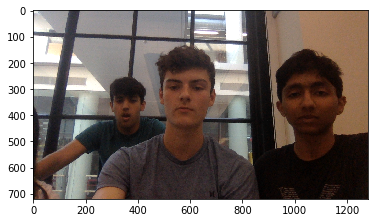

In [22]:
fig, ax = plt.subplots()
ax.imshow(pic)

In [23]:
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]
detections = list(face_detect(pic))
shape = shape_predictor(pic, detections[0])
descriptor = np.array(face_rec_model.compute_face_descriptor(pic, shape))
print(descriptor.shape)

(128,)


In [29]:
des = TakePicture.get_descriptor(pic)


File already exists:
	/Users/cooperbosch/Desktop/CogWorks/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/cooperbosch/Desktop/CogWorks/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


In [32]:
print(len(des))

3


In [28]:
print(face_detect(pic))

rectangles[[(472, 233) (687, 448)], [(950, 257) (1165, 472)], [(300, 314) (424, 438)]]


In [25]:
pic.shape

(720, 1280, 3)

In [26]:
type(TakePicture.face_detect)

dlib.fhog_object_detector

In [27]:
print(np.linalg.norm(des))

1.0


In [20]:
list(range(0))

[]

In [3]:
db = dict()

In [4]:
pic = TakePicture.take_pic()
des = TakePicture.get_descriptor(pic)[0]
name = input('Who is this?\n')

    


No camera config found, using defaults
	 port=0, exposure=0.7
Who is this?
cooper


In [5]:
if name in db:
    db[name](des)
else:
    db[name]=Profile(name, np.array([des]))

In [11]:
print(np.mean(db['cooper'].array, axis = 0))

[-0.11578392  0.05501353 -0.01394735 -0.06149363 -0.06551    -0.04319562
  0.03138085 -0.06986968  0.12034563 -0.04983716  0.13488775  0.01046837
 -0.15113445 -0.03592296 -0.05265743  0.04799978 -0.11254909 -0.10405458
 -0.04234763 -0.07982811  0.04067169  0.01181226 -0.04806595  0.07265712
 -0.12186965 -0.08431831 -0.02992901 -0.06256466  0.03660856 -0.11698561
  0.06045998  0.03040998 -0.10126289 -0.02709766 -0.02358727  0.0280106
 -0.02100378 -0.05672029  0.16098432  0.01452978 -0.12736723 -0.053207
 -0.00910432  0.24539978  0.13373775 -0.04242177 -0.01796864 -0.09241243
  0.16100706 -0.18353276  0.00624571  0.10659082  0.04934219  0.04332041
  0.02658528 -0.08144126  0.05351884  0.14364527 -0.15787277  0.04557099
  0.01098765 -0.08589581  0.03558549 -0.04612016  0.10552255  0.00535489
 -0.05927446 -0.05906884  0.114561   -0.11658905 -0.07610394  0.09965095
 -0.02478389 -0.15938062 -0.20205014  0.04563433  0.26500518  0.14385674
 -0.07791727  0.05478111 -0.04814994 -0.05567287  0.06

In [16]:
thing=db['cooper'].array
np.vstack((thing,np.array(des))).shape

(2, 128)

In [ ]:
while input('take picture?\n')!='q':
    

In [35]:
db.clear()

In [36]:
db

{}

No camera config found, using defaults
	 port=0, exposure=0.7


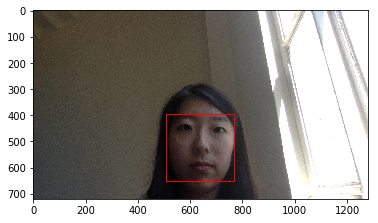

In [76]:
pic = TakePicture.take_pic()
des = TakePicture.get_descriptor(pic)[0]
fig, ax = plt.subplots()
ax.imshow(pic)
detections = list(face_detect(pic))
rectangles = []
for i in range(1):
    r = []
    r.append(detections[i].left())
    r.append(detections[i].top())
    r.append(detections[i].right()-detections[i].left())
    r.append(detections[i].bottom()-detections[i].top())
    rectangles.append(r)
for r in rectangles:
    rect = Rectangle((r[0],r[1]),r[2],r[3],linewidth=1,edgecolor='r',facecolor='none')

    ax.add_patch(rect)


In [77]:
name = input('Who is this?\n')
if name in db:
    db[name](des)
else:
    db[name]=Profile(name, np.array([des]))

Who is this?
jiin


In [84]:
print(len(db['aneesh'].array))

4


In [85]:
import pickle
save_file=open('database.dict','wb')
pickle.dump(db,save_file)
save_file.close()

In [88]:
sf2=open('database.dict','rb')
db2=pickle.load(sf2)
sf2.close()

In [89]:
db2['cooper']

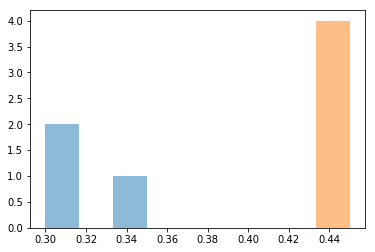

In [98]:
whispers.histogram(db)

In [ ]:
THRESHHOLD = .39